# Challenge exercises - SOLVED

## Challenge exercise 1

Let's practice these plotting skills by making some further plots from a set of sunspot data.

1. Download the datafile ```sunspot.month.csv``` from Moodle and upload it to the same directory in which this notebook is running.
1. The data is read in using the supplied functions below.
2. Plot the number of sunspots as a function of time. Make sure the plot is properly labelled.
1. Add Poisson counting error bars to the y-values. (Poisson counting error bars are simply +/-sqrt N).
3. Limit the extent of your axes to 30 years for an interval of your choice.
5. Save this plot.
1. Create a histogram of the number of sunspots
1. Label etc. the plot as needed
1. Save this plot as well.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed

In [ ]:
# We read in the data using the pandas module.
# This could have been read using the File object and techniques shown earlier ... And in fact that's what pandas
# will do internally, but if someone else has already provided a good solution its often good to just use it.

import pandas as pd
dat1 = pd.read_csv('sunspot.month.csv')
#What does the following line of code do? Make a note of this.
print(dat1.head(5))

# We need time and number of sunspots
year = dat1['time']
number_of_sunspots = dat1['number']


   entry         time  number
0      1  1749.000000    58.0
1      2  1749.083333    62.6
2      3  1749.166667    70.0
3      4  1749.250000    55.7
4      5  1749.333333    85.0


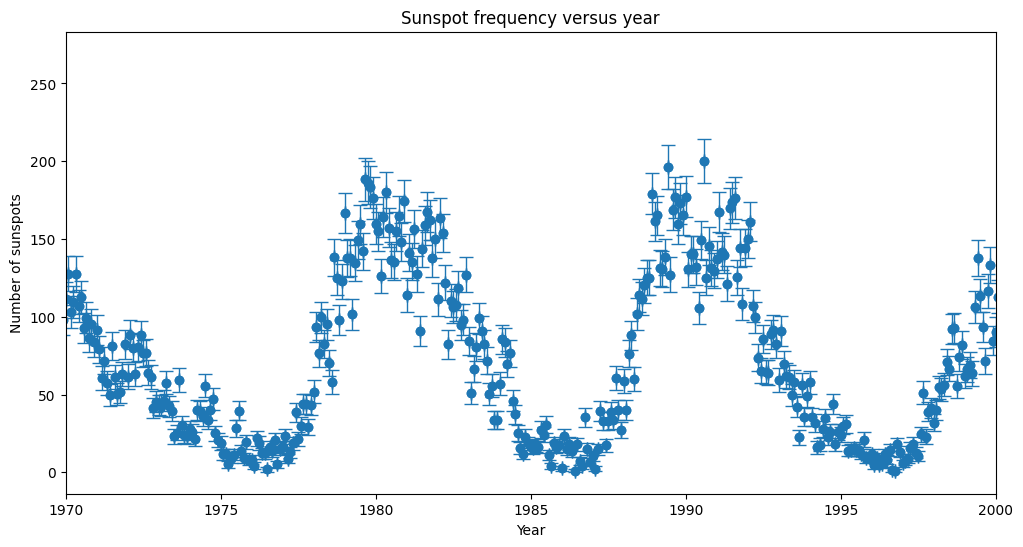

In [ ]:
err_y = np.sqrt(number_of_sunspots)

#Write your plotting code here
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#ax.plot(year, number_of_sunspots)
ax.scatter(year, number_of_sunspots, label='Sunspots')
ax.errorbar(year, number_of_sunspots, xerr=0, yerr=err_y, fmt='o', capsize=5, elinewidth=1)
ax.set_xlabel("Year")
ax.set_ylabel("Number of sunspots")
ax.set_title("Sunspot frequency versus year")
ax.set_xlim((1970,2000))
fig.savefig("sunspot_frequency.png",dpi=200)
plt.show()

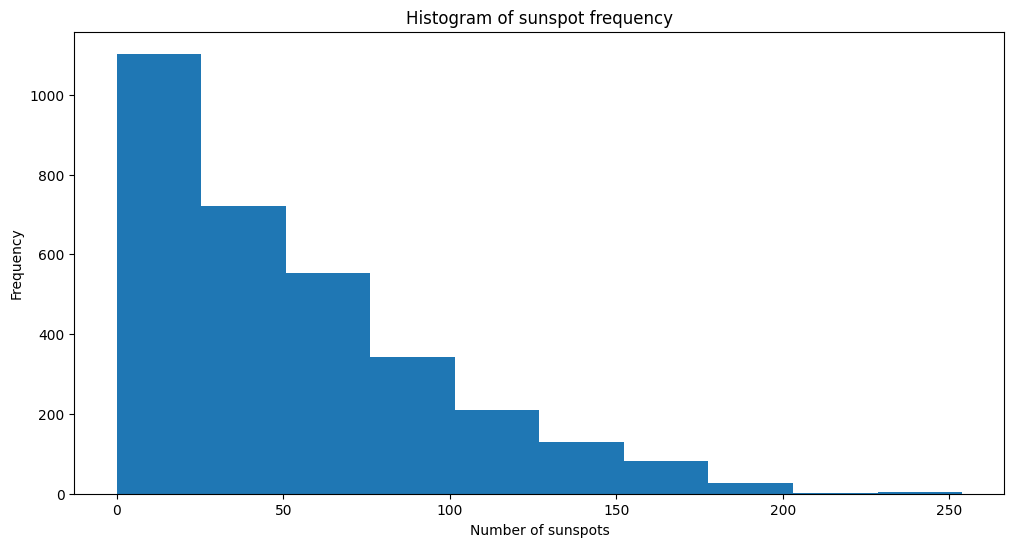

In [ ]:
#plot of the histogram
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
#ax.plot(year, number_of_sunspots)
ax.hist(number_of_sunspots)
ax.set_xlabel("Number of sunspots")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of sunspot frequency")
fig.savefig("sunspot_frequency_histogram.png",dpi=200)
plt.show()

## Challenge exercise 2

The Taylor series expansion for the function $f(x) = e^x$ is an $n^{th}$ order polynomial that approximates $f(x) = e^{x}$ for a given value of $x$. In this exercise, you will visualise how this approximation improves the more terms you add to the Taylor Series expansion. This exercise makes use of functions and for loops.

The Taylor series for $f(x) = e^{x}$ is:

$$e^{x} \approx \sum^{\infty}_{n=0}\frac{x^{n}}{n!} = 1+x+\frac{x^{2}}{2!} + \frac{x^{3}}{3!} + \frac{x^{4}}{4!} + \frac{x^{5}}{5!} + \cdots$$

1. Write a function n_factorial that computes the factorial of any positive integer. This should take a single integer $m$ as an input, and return $m!$ You may need the result $0! = 1$.
1. Write a function approx_e that takes a value of x and the order $n$ of the polynomial used to approximate $f(x) = e^{x}$. The function should return an approximation of $f(x) = e^x$ computed using a Taylor series expansion.
1. Produce a plot of $f(x) = e^{x}$ for values of $x$ between 0 and 3. You should calculate $e^{x}$ using ``np.exp()``. ``np.exp(2)`` finds $e^{2}$.
1. Using your functions, plot the Taylor series approximations of $f(x) = e^{x}$ for $3^{rd}$, $5^{th}$ and $7^{th}$ order polynomial approximations on the same set of axes. Be sure to include a legend to identify each approximation plotted.
1. Save the resulting plot.

In [ ]:
def n_factorial(m):
  if m == 0:
    nfact = 1
  else:
    nfact = 1
    for i in range(1,m+1):
      nfact *= i
  return nfact


def approx_e(x,n):
  ex = 1
  for i in range(1,n+1):
    ex += (x**i) /n_factorial(i)
  return ex

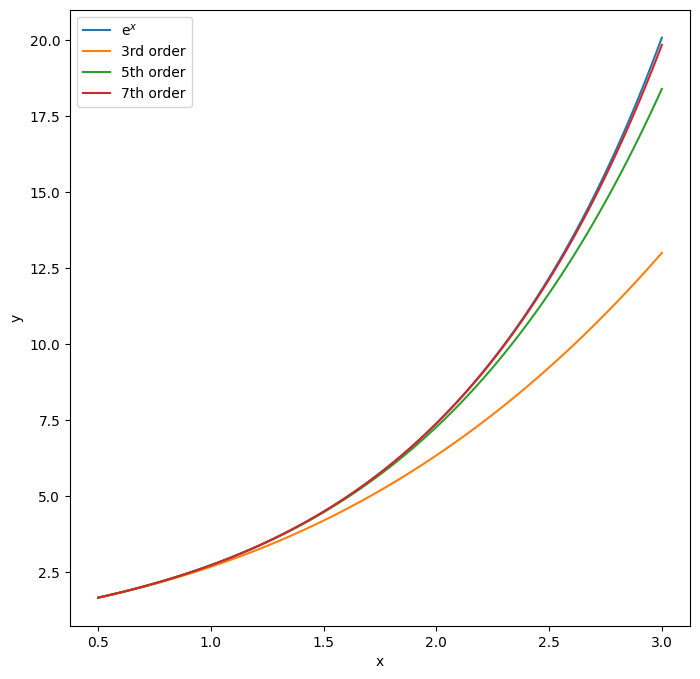

In [ ]:
import numpy as np
x = np.linspace(0.5,3,100)
y = np.exp(x)

y3 = approx_e(x,3)
y5 = approx_e(x,5)
y8 = approx_e(x,7)
#y12= approx_e(x,12)

plt.figure(figsize=(8,8))

plt.clf()
plt.plot(x,y, label="e$^{x}$")
plt.plot(x,y3, label="3rd order")
plt.plot(x,y5, label="5th order")
plt.plot(x,y8, label="7th order")
#plt.plot(x,y12, label="12th order")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()